# Effective Graph Paper
Code to generate "Figure 4 - Perturbation Models"

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict
import graphviz
import math
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display, SVG
import cana
from cana.datasets.bio import THALIANA
import networkx as nx

In [3]:
def normalize(x, ab, db):
    return db[0] + (x - ab[0]) * (db[1] - db[0]) / (ab[1] - ab[0])

In [4]:
# Graph Example
logic = {
    0 : {'name': 'x1', 'in': [], 'out': [1]},
    1 : {'name': 'xa', 'in': [0],'out': [0,0]},
    2 : {'name': 'xb', 'in': [0,1], 'out': [0,1,0,1]},
    3 : {'name': 'xc', 'in': [2], 'out': [0,0]},
    4 : {'name': 'x2', 'in': [1,2,3], 'out': [0,0,1,1,0,0,0,1]},
}
N = cana.boolean_network.BooleanNetwork(name='A', Nnodes=len(logic), logic=logic)

att = defaultdict(dict)
att['x1']['pos'] = '0.75,2.0'
att['xa']['pos'] = '0.0,1.3'
att['xb']['pos'] = '1.5,1.3'
att['xc']['pos'] = '1.5,0.3'
att['x2']['pos'] = '0.0,0.3'

SG = N.structural_graph()
EG = N.effective_graph(mode='input', bound='mean', threshold=-1)

## Interaction Graph

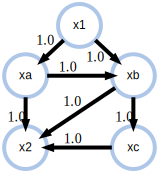

'SG.svg'

In [5]:
pSG = graphviz.Digraph(name='Interaction Graph', engine='neato')
pSG.attr('graph', size='3,3', concentrate='false', simplify='false', overlap='true',splines='false',ratio='auto')
pSG.attr('node', pin='true', shape='circle', fixedsize='true', width='.60', color='#aec7e8', style='filled', fillcolor='#1f77b4', penwidth='4', fontname='Helvetica', fontcolor='black',fontsize='12')
pSG.attr('edge', arrowhead='normal', arrowsize='.5', color='black', penwidth='4')

for nid, d in SG.nodes(data=True):
    nid = str(nid)
    label = str(d['label'])
    pos = att[d['label']]['pos']
    fillcolor = 'white'
    pSG.node(nid, label=label, pos=pos, fillcolor=fillcolor)

for uid,vid,d in SG.edges(data=True):
    uid = str(uid)
    vid = str(vid)
    label = str(d['weight'])
    pSG.edge(uid, vid, label=label)
    
display(SVG(pSG.pipe(format='svg')),metadata={'isolated':True})
# Export
pSG._format = 'svg'
pSG.render('SG', cleanup=True)

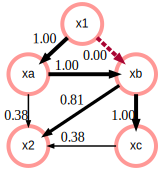

'EG.svg'

In [9]:
pEG = graphviz.Digraph(name='Effective Graph', engine='neato')
pEG.attr('graph', size='3,3', concentrate='false', simplify='false', overlap='true',splines='false', ratio='auto')
pEG.attr('node', pin='true', shape='circle', fixedsize='true', width='.55', color='#ff9896', style='filled', fillcolor='#515660', penwidth='4', fontname='Helvetica', fontcolor='black',fontsize='12')
pEG.attr('edge', arrowhead='normal', arrowsize='.5', color='black', penwidth='4')

for nid, d in EG.nodes(data=True):
    snid = str(nid)
    label = d['label']
    pos = att[d['label']]['pos']
    pEG.node(snid, label=label, pos=pos, fillcolor='white')

max_penwidth = 4
for uid,vid,d in EG.edges(data=True):
    uid = str(uid)
    vid = str(vid)
    weight = '{:f}'.format(d['weight']*100)
    penwidth = '%.2f' % ( d['weight']*max_penwidth )
    label = "{:.2f}".format(d['weight'])
    if d['weight'] > 0:
        pEG.edge(uid, vid, label=label, weight=weight, penwidth=penwidth)
    else:
        pEG.edge(uid, vid, label=label, style='dashed', color='#A90533')
    
display(SVG(pEG.pipe(format='svg')), metadata={'isolated':True})
# Export
pEG._format = 'svg'
pEG.render("EG", cleanup=True)